In [2]:
# Data preprocessing

import csv
from hypothesis_test import *
from kardis_test import *
from mg_calculator import *
from q_finder import *
from graph_distributions import *

file = open(r"Future/compas-scores-two-years-corrected.csv", mode='r', encoding='utf-8-sig')
csvreader = csv.reader(file)
rowlist = [row for row in csvreader]
for category in rowlist[0]:
    index = rowlist[0].index(category)
    exec(category + " = [row[index] for row in rowlist[1:]]")
file.close()

recid_scores = [score_text[x] for x in range(len(score_text))]

Null hypothesis (proposed distribution): [0.17250000000000001, 0.8275]

Proposed distribution rejected at alpha = 0.05. Kardis = 1.03335016307808e-496.
Any plausible distribution must boost probability over the given distribution by 4.83863087136534e+494, and will therefore have a minimum probability of 1.45787234581787e-6.
Closest plausible distribution: [0.4070932792064843, 0.5929067207935157]


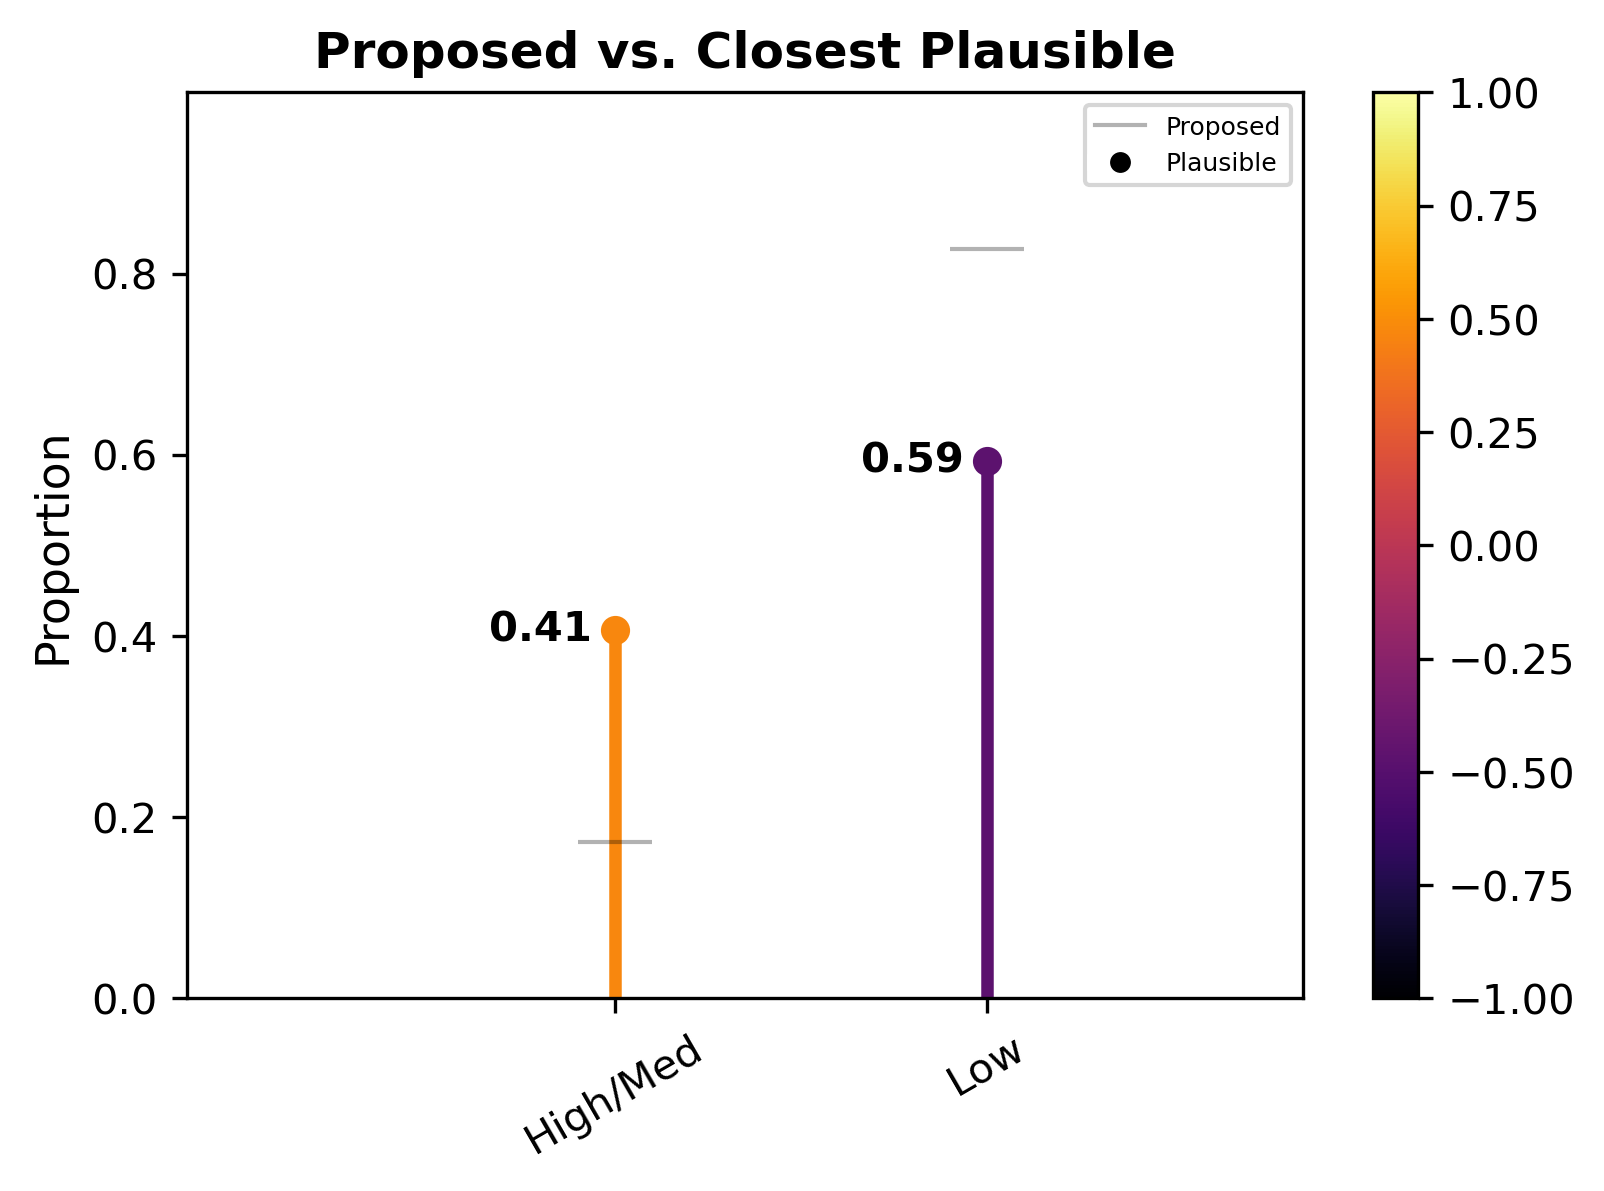

In [5]:
# Setup and Experiments
recid_scores = list(filter(lambda x: not x == 'N/A', recid_scores))
recid_binary = [x if x =='Low' else 'High/Med' for x in recid_scores]

florida_rates = [.18,.17,.17,.17]

#~17% of women recidivate within two years according to the Florida Dept. of Corrections
null_props = [sum(florida_rates)/len(florida_rates),1-(sum(florida_rates)/len(florida_rates))]

print("Null hypothesis (proposed distribution): " + str(null_props) + "\n")

q_null_props = hypothesis_test(recid_binary,\
                ['High/Med', 'Low'],\
                alpha = 0.05, hypothesis = null_props)[4]

graph_distributions(q_null_props,\
                    [('High/Med'),('Low')],
                    hypothesis=null_props, xl = [('High/Med'),('Low')], 
                    filename=r"Results/compas_scores_demo.pdf")